 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Inheritance
- Polymorphism
- Abstraction


## ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [9]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'


In [ ]:
class Test_Video():
    def __init__(self):
        self.title = None
                
    def add_title(self):
        new_title = input("What are you watching? ")
        self.title = new_title
                
                                 
        
    def __repr__(self):
        return "HELLO"
        
my_video = Test_Video()
print(my_video.title)

my_video.add_title()
print(my_video.title.title())

# DONT DO THIS
# my_video.title = "Ted Lasso"
print(my_video)


In [10]:
# attributes from instances are unique to that instance
# attributes are "protected" by the class itself and can have further protection at various levels based on access modifiers 

class Video():
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image
        
    def play(self):
        print(f"Now playing {self.title}")
        display(Image(self.link))
        
    def __len__(self):
        return self.length
    
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long. "
        
    

## INHERITANCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [11]:
#Episode inherits from Video class
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']

## POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>

In [12]:
class Series():
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
        

    def get_info(self, query=''):
        data = None #<-- in case we cant find the show we're looking for
        while not data:
            if not query:
                query = input("What is the name of the series? ")
               
            
            r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
            if r.status_code == 200:
                data = r.json()
            else:
                print(f"Series Error: status code {r.status_code}")
                
        #Use data to build out our attributes
        self.id = data['id']
        self.title = data['name']
        self.genres = [genre for genre in data['genres']]
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
                
                
        # Api call for episodes
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode Error: Status Code {r.status_code}")
        
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes] #other classes as attributes or the idea of composition
        print(f"{self.title} has {len(self.episodes)} episodes")
        
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? also get a job y/n")
                if watching.lower().strip() not in ('yes', 'y', 'yeah', 'ye', 'affirmative'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
    
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"
     

In [ ]:
first_show = Series()

first_show.get_info()


In [ ]:
first_show.watch()

In [13]:
class User:
    __id_counter = 1 #class attribute 
    def __init__(self, username, password):
        self.username = username
        self.password = password[::-2]
        self.id = User.__id_counter
        User.__id_counter += 1
        self.watch_list = []
        
    def __str__(self):
        formatted_user = f"""
        {self.id} - {self.username.title()}
        pw: {self.password}      
        """
        return formatted_user
    
    def __repr__(self):
        return f"<User {self.id} | {self.username}>"
    
    def check_password(self, password_guess):
        return self.password == password_guess[::-2]
    
    


## ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user. We have a bit to do before this becomes visible. But you've seen it before with presenting the user with the option to enter inputs. We then take those input and do something with them.
<br><br>

In [14]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Theater():

    def __init__(self):
        self.users = set()
        self.current_user = None


    # add a user to our collection of users
    def add_user(self):
        username = input("Please enter a username: ")
        if username in {u.username for u in self.users}:
            print("User with that name already exists. Please try again!") #409, conflict in requests

        else:
            password = input("Please enter your password. ")
            user = User(username, password)
            self.users.add(user)
            print(f"{user} has been created!!")

        self.login_user()

    # choose a user, login
    def login_user(self):
        username = input("What is your username? ")
        password = input("What is your password? ")

        for user in self.users:
            if user.username == username and user.check_password(password):
                self.current_user = user
                print(f"{user} has logged in!")
                break

        else:
            print("Username and/or password is incorrect")

    def logout(self):
        self.current_user = None
        print("You have succesfully logged out!")

    # update user information
    def update_user(self):
        # check if we even have a current user
        if self.current_user:
            print(self.current_user)
            new_user = input("Please enter the updated username or enter skip to keep your current username. ")
            if new_user.lower() != "skip":
                # referencing the current user object, specifically the username attribute
                self.current_user.username = new_user
            new_pw = input("Please enter the updated password or enter skip to keep current password. ")
            if new_pw.lower() != "skip":
                # referencing the current user object, specifically the password attribute
                self.current_user.password = new_pw

            print(f"{self.current_user.username}'s info has been updated!")

        else:
            print("Please login to update information.")
            self.login_user()


    # --------------------- interacting with the watchlist on the User ---------------------------------

    # add to watchlist
    def add_to_watchlist(self, query=''):
        # instatiates the Series class
        show = Series()
        show.get_info(query)
        # add our show (instance of the Series class) to the current_user object's watchlist attribute
        self.current_user.watch_list.append(show)

        print(f"{show.title} has been added to the watchlist!")

    # view watchlist
    def view_watchlist(self):
        for series in self.current_user.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n {series.summary}")
            #                 instance of Series, episodes attribute, first episdoe, link attribute from that first episode object
            display(Image(url=series.episodes[0].link))

    # delete from watchlist
    def delete(self):
        print("Your current watch list: ")
        self.view_watchlist()

        response = input("What would you like to remove from your watch list? ")
        for series in self.current_user.watch_list:
            # Series instance.title attribute. title method that capitalizes the first letter of the string. 
            if series.title.title() == response.title():
                self.current_user.watch_list.remove(series)
                print(f"{response.title()} has been removed from your watch list!")
                break
        else:
            print("That title is not in your watch list! ") # 404 not found

        self.view_watchlist()

    # choose from watchlist
    def choose_from_watchlist(self):
        self.view_watchlist()

        watch = input("What would you like to watch? ")
        for series in self.current_user.watch_list:
            if series.title.lower() == watch.lower().strip():
                series.watch()
                break

        else:
            response = input(f"{watch} is not in your watch list... would you like to add it.... y/n?")
            if response in ('yes', 'y'):
                self.add_to_watchlist(watch)
                print(".........")
                sleep(2)
                print(".........")
                self.current_user.watch_list[-1].watch()


    # run function to drive the program
    def run(self):
        """
        Method allowing users to sign in, choose a series, and play episodes
        """
        display(Image(url=generic_image))

        if self.users:
            self.choose_user()
        else:
            self.add_user()

            print("""
            What would you like to do?
            Add- add a new user
            Login - login to a your profile
            Update - update user info
            Logout - logout of your profile
            Search - Search for shows
            Watch - Pick something from your watchlist
            View - View watch list
            Delete - Delete from watch list
            Quit - Close the application           
            
            
            """)

        while True:
            response = input("What would you like to do? (add, update, login, logout, search, watch, view, delete, quit) ")
            
            if response.lower() == "search":
                self.add_to_watchlist()
            elif response.lower() == "watch":
                self.choose_from_watchlist()
            elif response.lower() == "add":
                self.add_user()
            elif response.lower() == 'logout':
                self.logout()
                new_response = input("What would you like to do next? login, add, quit")
                if new_response.lower() == 'add':
                    self.add_user()
                elif new_response.lower() == 'login':
                    self.login_user()
                elif new_response.lower() == 'quit':
                    print("Thanks for watching!")
                    break
                else:
                    print("Please enter a valid response and try again!")
            elif response.lower() == 'login':
                self.login_user()
            elif response.lower() == "update":
                self.update_user()
                    
                    
            
            elif response.lower() == "view":
                self.view_watchlist()
            elif response.lower() == "delete":
                self.delete()
            elif response.lower() == "quit":
                print(f"Thanks for watching! {self.current_user}! Now go outside!")
                break
            else:
                print("Invalid Input: please choose from the list!")

In [15]:
codeflix = Theater()



Please enter a username:  razvan
Please enter your password.  1234



        1 - Razvan
        pw: 42      
         has been created!!


What is your username?  razvan
What is your password?  1234



        1 - Razvan
        pw: 42      
         has logged in!

            What would you like to do?
            Add- add a new user
            Login - login to a your profile
            Update - update user info
            Logout - logout of your profile
            Search - Search for shows
            Watch - Pick something from your watchlist
            View - View watch list
            Delete - Delete from watch list
            Quit - Close the application           
            
            
            


What would you like to do? (add, update, login, logout, search, watch, view, delete, quit)  search
What is the name of the series?  the wire


The Wire has 60 episodes
The Wire has been added to the watchlist!


What would you like to do? (add, update, login, logout, search, watch, view, delete, quit)  watch




Title: The Wire | Episodes: 60

Summary: 
 None


What would you like to watch?  the wire


Now playing The Target


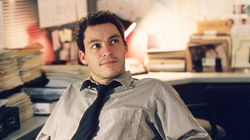

Now playing The Detail


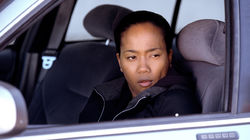

Now playing The Buys


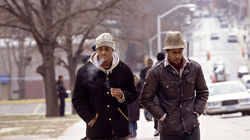

Are you still watching? also get a job y/n no
What would you like to do? (add, update, login, logout, search, watch, view, delete, quit)  quit


Thanks for watching! 
        1 - Razvan
        pw: 42      
        ! Now go outside!


In [16]:
codeflix.run()

## Exercise 1

<p>Describe in your own words the following concepts and give an analogy tying to a real-world concept.

#### Difference between a Class & an Object

#### Encapsulation

#### Inheritance

#### Polymorphism

#### Abstraction

##  Exercise 2 (Optional):
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads. Make sure you either write out your thoughts in the below cell  or comment where you added code to the above Classes.